In [63]:
import pandas as pd
import numpy as np
import skrf as rf
import matplotlib.pyplot as plt
import math
import os
from numpy.linalg import multi_dot

In [64]:
def parse_s2p(file):
    data_s2p = pd.read_table(file, sep=" ", header=None,  names=["Frequency ", "S11 real", "S11 imaginary", "S12 real", "S12 imaginary",  "S21 real", "S21 imaginary",  "S22 real", "S22 imaginary" ])
    data_s2p.drop(data_s2p.head(3).index,inplace=True)
    return data_s2p

In [65]:
mdf_file_path ='C:/Users/Dell/Desktop/EE work/s2p/SEI_VGQM5VDQ050_T25_s2p/SEI_VGQM5VDQ050_T25.mdf'
dir_name = os.path.dirname(mdf_file_path)

data_file_mdf = pd.read_csv(mdf_file_path, sep=" ", header=None,  names=[" ", "FILENAME(string)", "Temp_C(real)", "Vd(real)","Id(real)", "Vg(real)" ])
data_file_mdf.drop(data_file_mdf.head(2).index,inplace=True)
data_file_mdf.drop(data_file_mdf.tail(1).index,inplace=True)
data_file_mdf

,,FILENAME(string),Temp_C(real),Vd(real),Id(real),Vg(real)
2,1,FOLDER\AA1.s2p,25,+5.61562E-02,-1.58459E-04,-5.00071E+00
3,2,FOLDER\AA2.s2p,25,+4.92744E-01,-2.04479E-04,-4.99913E+00
4,3,FOLDER\AA3.s2p,25,+1.00714E+00,-1.72999E-04,-5.00088E+00
5,4,FOLDER\AA4.s2p,25,+1.50498E+00,-1.65738E-04,-4.99965E+00
6,5,FOLDER\AA5.s2p,25,+2.03171E+00,-9.55084E-05,-5.00053E+00
...,...,...,...,...,...,...
1608,1607,FOLDER\GW5.s2p,25,+1.02690E+01,+8.81087E-01,+1.99870E+00
1609,1608,FOLDER\GW6.s2p,25,+1.12627E+01,+8.93233E-01,+2.00010E+00
1610,1609,FOLDER\GW7.s2p,25,+1.22549E+01,+9.03618E-01,+2.00003E+00
1611,1610,FOLDER\GW8.s2p,25,+1.32358E+01,+9.12492E-01,+1.99973E+00


In [66]:
tabledata = np.asarray(data_file_mdf)

for rows in range(tabledata.shape[0]):
    tabledata[rows][1] = os.path.split(tabledata[rows][1] .replace("\\","/"))[1]
# tabledata
tabledata[:, 0] = tabledata[:, 0].astype('int64')
tabledata

array([[1, 'AA1.s2p', '25', '+5.61562E-02', '-1.58459E-04',
        '-5.00071E+00'],
       [2, 'AA2.s2p', '25', '+4.92744E-01', '-2.04479E-04',
        '-4.99913E+00'],
       [3, 'AA3.s2p', '25', '+1.00714E+00', '-1.72999E-04',
        '-5.00088E+00'],
       ...,
       [1609, 'GW7.s2p', '25', '+1.22549E+01', '+9.03618E-01',
        '+2.00003E+00'],
       [1610, 'GW8.s2p', '25', '+1.32358E+01', '+9.12492E-01',
        '+1.99973E+00'],
       [1611, 'GW9.s2p', '25', '+1.42393E+01', '+9.20569E-01',
        '+2.00023E+00']], dtype=object)

In [67]:
file_numbers = [1, 54, 107, 213, 266, 319, 425, 1531, 1482, 1405, 1323, 1264, 1201, 1061, 979, 743, 478, 372]
# file_numbers = [21, 74, 127, 180, 233, 286, 339, 392, 445, 498, 551, 604, 657, 711, 764, 816, 865] 
len(file_numbers)

18

In [68]:
file_names = []
vd_values = []
vg_values = []
files_dict = {}

for number in file_numbers:
    row = list(tabledata[:, 0]).index(number)
    file_names.append(tabledata[row][1])
    vd_values.append(tabledata[row][3])
    vg_values.append(tabledata[row][5])
#     files_dict[number] = [tabledata[row][1], tabledata[row][3], tabledata[row][5] ]

files_dict = {'point': file_numbers, 'name': file_names, 'vd': vd_values, 'vg': vg_values}

files_dataframe = pd.DataFrame(files_dict)#.items(), columns=['Number', 'File Names'])#, 'vd', 'vg'])

files_dataframe

,point,name,vd,vg
0,1,AA1.s2p,+5.61562E-02,-5.00071E+00
1,54,AF9.s2p,+6.11897E-02,-4.49973E+00
2,107,AL8.s2p,+4.23274E-02,-4.00112E+00
3,213,AX6.s2p,+6.08937E-02,-3.39971E+00
4,266,BD5.s2p,+7.37977E-02,-3.29909E+00
5,319,BJ4.s2p,+4.72462E-02,-3.20040E+00
6,425,BV2.s2p,+4.68597E-02,-3.00022E+00
7,1531,GO1.s2p,+1.32836E+01,+1.39977E+00
8,1482,GI6.s2p,+8.16863E-01,+1.20051E+00
9,1405,GA1.s2p,+4.47219E+00,+5.99648E-01


In [69]:
def cgd_meas(de_embedded_y, freq):
    cgd_meas_values = []
    for y, f in zip(de_embedded_y, freq):
        w = 2 * (np.pi) * f
        val = -1 * (y[0][1].imag/ w)
        cgd_meas_values.append(val)
    return cgd_meas_values

def cgs_meas(de_embedded_y, freq):
    cgs_meas_values = []
    for y, f in zip(de_embedded_y, freq):
        w = 2 * (np.pi) * f
        val = (y[0][0].imag + y[0][1].imag) / w
        cgs_meas_values.append(val)
    return cgs_meas_values

def gm_meas(de_embedded_y, freq):
    gm_meas = []
    for y in de_embedded_y:
        gm_meas.append(np.absolute(y[1][0].real))
    
    return gm_meas

def cds_meas(de_embedded_y, freq):
    cds_meas_values = []
    for y, f in zip(de_embedded_y, freq):
        w = 2 * (np.pi) * f
        val = ((y[1][1].imag + y[0][1].imag)/ w)
        cds_meas_values.append(val)
    return cds_meas_values

def rds_model(de_embedded_y, freq):
    rds_model = []
    for y, f in zip(de_embedded_y, freq):
        val = 1 / (y[1][1].real + y[0][1].real)
        rds_model.append(val)
    return rds_model



In [70]:
cgd_dict = {}
cgs_dict = {}
gm_dict = {}
cds_meas_dict = {}
rds_model_dict = {}

In [71]:
manifold_in = 'Downloads/UnitCell_Manifold_in_wLauncher.s2p'
manifold_ntwk_in = rf.Network(manifold_in)
manifold_ntwk_in_t = manifold_ntwk_in.t

manifold_out = 'Downloads/UnitCell_Manifold_out_wLauncher.s2p'
manifold_ntwk_out = rf.Network(manifold_out)
manifold_ntwk_out_t = manifold_ntwk_out.t

In [72]:
############################################## Give the maximum frequency ################################################

In [73]:
base_frequency = 4e+08
max_frequency = 400e+08
step_size = 1e+08
steps = ((max_frequency - base_frequency) / step_size) + 1
steps

397.0

In [74]:
def matrix(lists, i):
    mat = np.zeros((2,2), dtype = "complex")
    mat[0][0], mat[0][1] = lists[i][0][0], lists[i][0][1]
    mat[1][0], mat[1][1] = lists[i][1][0], lists[i][1][1]    
    return mat

def mat_calculation(manifold_ntwk_in_t, s2p_file_t, manifold_ntwk_out_t):
    
    de_embedded_tb = []
    for i in range(len(s2p_file_t)):
        ta_inv = matrix(manifold_ntwk_in_t, i)
        t_total = matrix(s2p_file_t, i)
        tc_inv = matrix(manifold_ntwk_out_t, i)
        
        result_mat = multi_dot([ta_inv, t_total, tc_inv])
        
        de_embedded_tb.append(result_mat)

    return de_embedded_tb

In [75]:
################################################# De-embedding ######################################################

In [76]:
for names in file_names:
    f = os.path.join(dir_name, names)
    f = f.replace("\\","/")
    
    filename = os.path.split(f)[1]
    
    s2p_dataframe = parse_s2p(f)
    s2p_data_array = (np.asarray(s2p_dataframe)).astype('float32')
    freq = s2p_data_array[0:int(steps), 0]

    ntwk = rf.Network(f)
    s2p_file_t = ntwk.t

    de_embedded_tb = mat_calculation(np.linalg.inv(manifold_ntwk_in_t[0:int(steps)]), s2p_file_t[0:int(steps)], np.linalg.inv(manifold_ntwk_out_t[0:int(steps)]))

    de_embedded_tb = np.array(de_embedded_tb)
    de_embedded_s = rf.network.t2s(de_embedded_tb)
    de_embedded_y = rf.network.s2y(de_embedded_s, z0=50, s_def='power')
    
    cgd_dict[filename] = cgd_meas(de_embedded_y, freq)
    cgs_dict[filename] = cgs_meas(de_embedded_y, freq)
    gm_dict[filename] = gm_meas(de_embedded_y, freq)
    cds_meas_dict[filename] = cds_meas(de_embedded_y, freq)
    rds_model_dict[filename] = rds_model(de_embedded_y, freq)

In [77]:
################################################### cgd ########################################################

In [78]:
cgd_dataframe = pd.DataFrame(cgd_dict)
cgd_dataframe.insert(0, 'Frequency', freq)
cgd_dataframe_array = np.asarray(cgd_dataframe)
cgd_dataframe

,Frequency,AA1.s2p,AF9.s2p,AL8.s2p,AX6.s2p,BD5.s2p,BJ4.s2p,BV2.s2p,GO1.s2p,GI6.s2p,GA1.s2p,FQ9.s2p,FK4.s2p,FD4.s2p,EN8.s2p,EE7.s2p,DE5.s2p,CB1.s2p,BP3.s2p
0,4.000000e+08,3.427860e-13,3.334573e-13,3.405362e-13,3.488910e-13,3.608475e-13,3.506463e-13,3.666764e-13,1.874356e-13,6.190661e-13,3.744693e-13,1.907145e-13,1.098090e-13,8.698158e-14,4.418733e-14,2.908293e-14,6.230901e-13,3.774911e-13,3.577961e-13
1,5.000000e+08,3.313841e-13,3.400378e-13,3.415826e-13,3.488629e-13,3.554760e-13,3.488403e-13,3.598764e-13,1.828763e-13,5.971394e-13,3.726164e-13,2.066074e-13,1.098022e-13,7.843526e-14,3.839093e-14,2.710830e-14,6.309395e-13,3.638285e-13,3.557931e-13
2,6.000000e+08,3.353237e-13,3.376598e-13,3.418525e-13,3.480093e-13,3.488722e-13,3.510107e-13,3.599179e-13,1.714179e-13,6.224189e-13,3.738104e-13,1.931405e-13,1.185099e-13,8.185769e-14,4.130333e-14,2.788997e-14,6.179843e-13,3.651062e-13,3.547900e-13
3,7.000000e+08,3.327951e-13,3.376273e-13,3.442330e-13,3.482674e-13,3.511255e-13,3.518132e-13,3.587533e-13,1.773122e-13,5.969755e-13,3.710246e-13,1.929398e-13,1.185958e-13,8.404872e-14,3.962281e-14,2.790460e-14,6.291896e-13,3.655249e-13,3.573670e-13
4,8.000000e+08,3.308660e-13,3.343263e-13,3.413784e-13,3.498495e-13,3.493328e-13,3.523018e-13,3.604703e-13,1.753783e-13,6.673219e-13,3.834084e-13,1.964013e-13,1.175683e-13,8.578780e-14,4.152491e-14,2.731297e-14,6.221239e-13,3.665172e-13,3.543731e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.960000e+10,-1.111561e-13,-1.381889e-13,-1.506965e-13,-1.256237e-13,-8.306867e-14,-1.396377e-13,-1.413875e-13,-5.718489e-15,-3.537530e-14,-3.251551e-14,-1.013973e-13,-9.604434e-14,-6.605432e-14,1.237919e-13,8.994552e-14,-7.885208e-14,-1.136534e-13,-1.222137e-13
393,3.970000e+10,-1.555221e-13,-1.586649e-13,-1.216741e-13,-1.575498e-13,-1.297731e-13,-1.346593e-13,-1.207253e-13,-1.917935e-14,-3.520198e-14,-5.295305e-14,-8.140596e-14,-8.100450e-14,-7.283472e-14,8.975803e-14,1.113932e-13,-8.208563e-14,-1.376721e-13,-1.446637e-13
394,3.980000e+10,-1.200207e-13,-1.157353e-13,-1.308595e-13,-1.185148e-13,-1.767790e-13,-1.342902e-13,-1.321601e-13,-5.512291e-15,-3.568129e-14,-5.533879e-14,-5.269620e-14,-3.330598e-14,-4.580517e-14,1.100006e-13,1.143939e-13,-7.475541e-14,-1.343184e-13,-1.230180e-13
395,3.990000e+10,-1.044880e-13,-1.474368e-13,-9.841288e-14,-1.402092e-13,-1.403601e-13,-1.567070e-13,-1.012361e-13,2.614367e-14,-2.421129e-14,-4.728919e-14,-6.806740e-14,-1.173246e-13,-1.838381e-14,1.097222e-13,1.047854e-13,-9.488388e-14,-9.577287e-14,-1.089170e-13


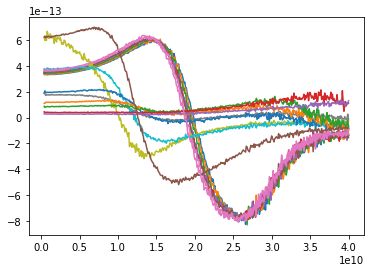

In [79]:
for i in range(17):
    plt.plot(cgd_dataframe_array[:,0], cgd_dataframe_array[:,(i + 1)])

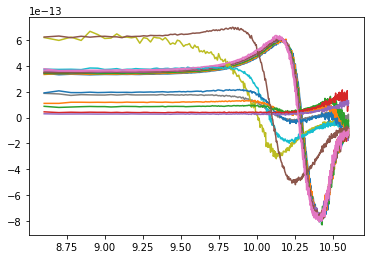

In [80]:
for i in range(17):
    plt.plot(np.log10(cgd_dataframe_array[:,0]), cgd_dataframe_array[:,(i + 1)])

In [81]:
################################################### cgs ########################################################

In [82]:
cgs_dataframe = pd.DataFrame(cgs_dict)
cgs_dataframe.insert(0, 'Frequency', freq)
cgs_dataframe_array = np.asarray(cgs_dataframe)
cgs_dataframe

,Frequency,AA1.s2p,AF9.s2p,AL8.s2p,AX6.s2p,BD5.s2p,BJ4.s2p,BV2.s2p,GO1.s2p,GI6.s2p,GA1.s2p,FQ9.s2p,FK4.s2p,FD4.s2p,EN8.s2p,EE7.s2p,DE5.s2p,CB1.s2p,BP3.s2p
0,4.000000e+08,6.311370e-13,6.561266e-13,6.754946e-13,6.973324e-13,6.997258e-13,7.165513e-13,7.208841e-13,2.300073e-12,2.025844e-12,2.231701e-12,2.264286e-12,2.172720e-12,2.028499e-12,2.011899e-12,2.085922e-12,1.668606e-12,7.360756e-13,7.082759e-13
1,5.000000e+08,6.359560e-13,6.465025e-13,6.691843e-13,7.017210e-13,7.009298e-13,7.109686e-13,7.246006e-13,2.326565e-12,2.059042e-12,2.232776e-12,2.138366e-12,2.183040e-12,2.112080e-12,2.086945e-12,2.104545e-12,1.661506e-12,7.544047e-13,7.172836e-13
2,6.000000e+08,6.306513e-13,6.483979e-13,6.705013e-13,6.983220e-13,7.066316e-13,7.090020e-13,7.223502e-13,2.381188e-12,2.029524e-12,2.233273e-12,2.249617e-12,2.100114e-12,2.083969e-12,2.048780e-12,2.095363e-12,1.674517e-12,7.557787e-13,7.144648e-13
3,7.000000e+08,6.288029e-13,6.504871e-13,6.660877e-13,6.986417e-13,7.015957e-13,7.114778e-13,7.225967e-13,2.347831e-12,2.055874e-12,2.245254e-12,2.260046e-12,2.101999e-12,2.061378e-12,2.065827e-12,2.104153e-12,1.663472e-12,7.540775e-13,7.157964e-13
4,8.000000e+08,6.379194e-13,6.527744e-13,6.685042e-13,6.973799e-13,7.035366e-13,7.058423e-13,7.191374e-13,2.361270e-12,1.989228e-12,2.213637e-12,2.227367e-12,2.113969e-12,2.043829e-12,2.044306e-12,2.108059e-12,1.676536e-12,7.542710e-13,7.140592e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.960000e+10,-3.026145e-13,-2.805127e-13,-2.560657e-13,-2.944659e-13,-3.350779e-13,-2.882037e-13,-2.783574e-13,-4.451856e-13,-4.212999e-13,-4.347447e-13,-3.961955e-13,-4.212880e-13,-4.656817e-13,-6.258199e-13,-6.086023e-13,-3.464972e-13,-3.024552e-13,-2.938279e-13
393,3.970000e+10,-2.711068e-13,-2.466888e-13,-3.026365e-13,-2.462606e-13,-2.830094e-13,-2.885941e-13,-3.003062e-13,-4.287476e-13,-4.300282e-13,-3.974128e-13,-4.255772e-13,-4.411711e-13,-4.593530e-13,-6.036293e-13,-5.877441e-13,-3.521959e-13,-2.871057e-13,-2.665164e-13
394,3.980000e+10,-3.081436e-13,-3.100990e-13,-2.984566e-13,-3.077968e-13,-2.418987e-13,-2.808824e-13,-2.946270e-13,-4.481732e-13,-4.232336e-13,-3.984779e-13,-4.236539e-13,-4.583784e-13,-4.645907e-13,-6.122593e-13,-6.207264e-13,-3.357976e-13,-2.891107e-13,-2.957543e-13
395,3.990000e+10,-3.229735e-13,-2.775799e-13,-3.077764e-13,-2.829490e-13,-2.769352e-13,-2.715253e-13,-3.219308e-13,-4.573757e-13,-4.154273e-13,-4.015171e-13,-4.250590e-13,-3.736515e-13,-4.899982e-13,-6.043807e-13,-5.902714e-13,-3.310630e-13,-3.325355e-13,-3.084250e-13


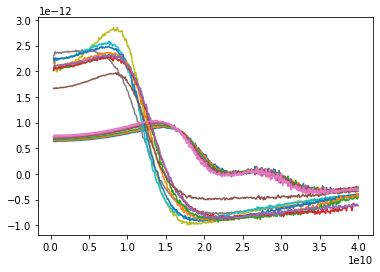

In [83]:
for i in range(17):
    plt.plot(cgs_dataframe_array[:,0], cgs_dataframe_array[:,(i + 1)])

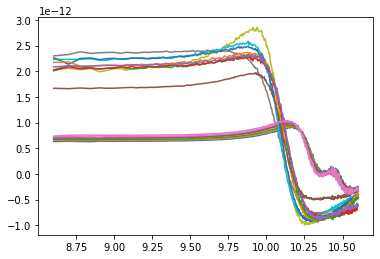

In [84]:
for i in range(17):
    plt.plot(np.log10(cgs_dataframe_array[:,0]), cgs_dataframe_array[:,(i + 1)])

In [85]:
################################################### gm ########################################################

In [86]:
gm_dataframe = pd.DataFrame(gm_dict)
gm_dataframe.insert(0, 'Frequency', freq)
gm_dataframe_array = np.asarray(gm_dataframe)
gm_dataframe

,Frequency,AA1.s2p,AF9.s2p,AL8.s2p,AX6.s2p,BD5.s2p,BJ4.s2p,BV2.s2p,GO1.s2p,GI6.s2p,GA1.s2p,FQ9.s2p,FK4.s2p,FD4.s2p,EN8.s2p,EE7.s2p,DE5.s2p,CB1.s2p,BP3.s2p
0,4.000000e+08,0.000005,0.000031,2.496100e-05,0.000004,0.000020,0.000011,0.000003,0.126129,0.010374,0.105769,0.205934,0.234440,0.241719,0.249782,0.243772,0.013456,1.076575e-05,0.000003
1,5.000000e+08,0.000012,0.000001,3.986293e-07,0.000019,0.000032,0.000005,0.000021,0.126456,0.010555,0.106765,0.204208,0.230913,0.245820,0.250655,0.247413,0.013401,3.771424e-07,0.000017
2,6.000000e+08,0.000004,0.000010,2.002088e-05,0.000022,0.000019,0.000011,0.000022,0.126159,0.009942,0.105098,0.205069,0.228753,0.243327,0.250798,0.248632,0.012963,6.398866e-06,0.000036
3,7.000000e+08,0.000026,0.000014,2.677943e-05,0.000040,0.000023,0.000016,0.000027,0.125938,0.009816,0.105056,0.203829,0.229185,0.242106,0.252647,0.248012,0.012638,2.705686e-05,0.000031
4,8.000000e+08,0.000035,0.000031,2.442281e-05,0.000041,0.000024,0.000026,0.000035,0.126105,0.009920,0.105454,0.204236,0.229573,0.241822,0.250543,0.247334,0.012362,2.353693e-05,0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.960000e+10,0.021763,0.017366,2.826266e-02,0.028623,0.025808,0.019520,0.020980,0.024376,0.011651,0.018384,0.010222,0.008345,0.025258,0.097938,0.045873,0.010450,2.658162e-02,0.018807
393,3.970000e+10,0.015568,0.020798,1.648603e-02,0.021902,0.018741,0.020564,0.022745,0.026110,0.013809,0.017783,0.007355,0.005662,0.025875,0.074358,0.044666,0.007001,2.246469e-02,0.015958
394,3.980000e+10,0.016795,0.026974,2.030081e-02,0.019604,0.020025,0.019730,0.014321,0.019571,0.010054,0.011369,0.020239,0.034616,0.033959,0.101573,0.037784,0.002425,2.179191e-02,0.017999
395,3.990000e+10,0.020803,0.011394,3.081947e-02,0.010743,0.014471,0.024088,0.014247,0.019906,0.010669,0.015117,0.000924,0.006168,0.046749,0.086943,0.033493,0.005789,2.101831e-02,0.028789


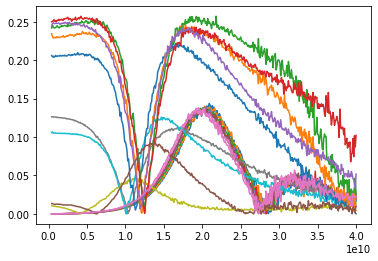

In [87]:
for i in range(17):
    plt.plot(gm_dataframe_array[:,0], gm_dataframe_array[:,(i + 1)])

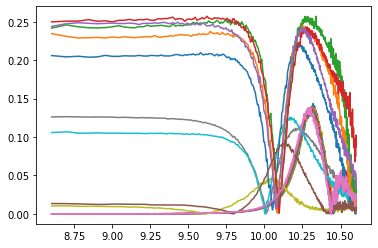

In [88]:
for i in range(17):
    plt.plot(np.log10(gm_dataframe_array[:,0]), gm_dataframe_array[:,(i + 1)])

In [89]:
################################################### cds ########################################################

In [90]:
cds_dataframe = pd.DataFrame(cds_meas_dict)
cds_dataframe.insert(0, 'Frequency', freq)
cds_dataframe_array = np.asarray(cds_dataframe)
cds_dataframe

,Frequency,AA1.s2p,AF9.s2p,AL8.s2p,AX6.s2p,BD5.s2p,BJ4.s2p,BV2.s2p,GO1.s2p,GI6.s2p,GA1.s2p,FQ9.s2p,FK4.s2p,FD4.s2p,EN8.s2p,EE7.s2p,DE5.s2p,CB1.s2p,BP3.s2p
0,4.000000e+08,4.238396e-13,4.478348e-13,4.425777e-13,4.389274e-13,4.237502e-13,4.459427e-13,4.303042e-13,2.596281e-13,-5.705735e-12,1.106009e-13,5.331979e-13,5.010895e-13,4.017547e-13,2.908882e-13,3.053948e-13,6.198376e-14,4.288334e-13,4.453469e-13
1,5.000000e+08,4.435094e-13,4.368920e-13,4.450114e-13,4.463627e-13,4.423743e-13,4.492102e-13,4.486051e-13,3.943729e-13,-4.072237e-12,3.741359e-13,4.228994e-13,5.726163e-13,5.123205e-13,3.924283e-13,3.015034e-13,7.573842e-14,4.546593e-13,4.459702e-13
2,6.000000e+08,4.345923e-13,4.389563e-13,4.421703e-13,4.409109e-13,4.439178e-13,4.458431e-13,4.500548e-13,4.391407e-13,-5.110313e-12,2.031905e-13,5.364427e-13,4.742279e-13,4.815326e-13,3.467092e-13,2.664511e-13,1.840528e-13,4.468262e-13,4.436310e-13
3,7.000000e+08,4.398467e-13,4.388292e-13,4.405079e-13,4.446729e-13,4.446257e-13,4.473843e-13,4.449703e-13,3.576239e-13,-5.387034e-12,1.543614e-13,5.409150e-13,4.624900e-13,4.558215e-13,3.403883e-13,2.767585e-13,1.644597e-13,4.472873e-13,4.420198e-13
4,8.000000e+08,4.413105e-13,4.449319e-13,4.432236e-13,4.456110e-13,4.478202e-13,4.471859e-13,4.426633e-13,3.867095e-13,-5.042590e-12,1.117547e-13,4.982819e-13,4.762620e-13,4.418456e-13,3.408162e-13,2.915876e-13,2.020743e-13,4.456143e-13,4.455276e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.960000e+10,-7.764772e-13,-7.804384e-13,-7.805351e-13,-8.567304e-13,-8.521948e-13,-8.110308e-13,-8.235413e-13,-3.096560e-14,-3.908816e-13,-3.559888e-13,-4.189132e-13,-4.653341e-13,-5.079830e-13,4.762418e-13,7.216624e-13,-5.312018e-13,-8.393466e-13,-7.712222e-13
393,3.970000e+10,-7.420436e-13,-7.584052e-13,-7.891959e-13,-7.663797e-13,-8.378123e-13,-7.392483e-13,-7.472369e-13,1.589993e-14,-4.067612e-13,-3.601764e-13,-4.129449e-13,-4.599831e-13,-4.586491e-13,5.173338e-13,6.616360e-13,-5.661830e-13,-7.386273e-13,-7.795721e-13
394,3.980000e+10,-6.835193e-13,-7.088432e-13,-6.818527e-13,-7.438562e-13,-7.445523e-13,-7.381476e-13,-7.333170e-13,-7.527211e-14,-3.765802e-13,-3.538843e-13,-3.919893e-13,-3.046577e-13,-3.813772e-13,5.166124e-13,6.447856e-13,-5.248684e-13,-7.630885e-13,-7.087114e-13
395,3.990000e+10,-7.304570e-13,-6.687160e-13,-6.705188e-13,-7.181164e-13,-7.269570e-13,-6.980067e-13,-7.258294e-13,-1.214757e-13,-3.868481e-13,-3.753581e-13,-4.469968e-13,-5.071343e-13,-3.135353e-13,3.914416e-13,6.380957e-13,-4.937826e-13,-7.403243e-13,-8.710334e-13


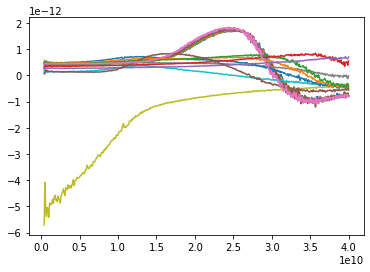

In [91]:
for i in range(17):
    plt.plot(cds_dataframe_array[:,0], cds_dataframe_array[:,(i + 1)])

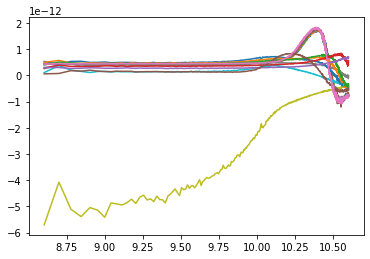

In [92]:
for i in range(17):
    plt.plot(np.log10(cds_dataframe_array[:,0]), cds_dataframe_array[:,(i + 1)])

In [93]:
################################################### rds ########################################################

In [94]:
rds_dataframe = pd.DataFrame(rds_model_dict)
rds_dataframe.insert(0, 'Frequency', freq)
rds_dataframe_array = np.asarray(rds_dataframe)
rds_dataframe

,Frequency,AA1.s2p,AF9.s2p,AL8.s2p,AX6.s2p,BD5.s2p,BJ4.s2p,BV2.s2p,GO1.s2p,GI6.s2p,GA1.s2p,FQ9.s2p,FK4.s2p,FD4.s2p,EN8.s2p,EE7.s2p,DE5.s2p,CB1.s2p,BP3.s2p
0,4.000000e+08,3.989325e+04,-142567.375734,-77820.480339,-91777.719109,3.989970e+04,510684.694362,25731.331453,84.470832,3.388530,19.411756,99.688369,162.271380,226.627008,465.644986,948.269406,23.982690,-114675.154353,-144255.071338
1,5.000000e+08,8.338534e+04,200617.612244,89748.837687,101880.571589,1.151842e+05,-155627.591267,84097.249652,83.373749,3.371628,19.162373,100.830418,170.360514,206.435879,452.123656,714.498737,23.978196,145689.774980,301580.923229
2,6.000000e+08,-1.245338e+06,31041.721524,49241.972616,85915.705709,-5.091653e+04,-282883.992775,36756.360001,83.260870,3.467293,19.407817,100.054150,177.910649,219.322447,452.394356,677.202877,24.035285,-84976.584563,-70614.193554
3,7.000000e+08,1.084385e+06,-754806.101384,-376340.033702,75997.508941,6.423091e+05,948367.407756,-632251.955852,82.813004,3.446065,19.424203,101.964543,175.967058,223.336327,416.417516,723.432981,24.077902,-117489.875239,-80539.121523
4,8.000000e+08,9.485708e+06,156919.898137,511612.226937,43317.068492,-1.867385e+06,-110535.414241,154839.488195,82.505493,3.442923,19.300254,100.942526,174.058967,224.401768,447.997847,737.405835,24.070798,67037.278724,87575.418868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.960000e+10,5.712073e+00,6.368547,6.001341,5.792297,6.126665e+00,6.422982,6.483936,5.295793,20.590680,7.401096,5.646977,4.148064,3.843383,3.623494,11.315352,7.888983,6.289429,5.356534
393,3.970000e+10,5.642164e+00,5.308879,5.534480,5.497610,5.568434e+00,5.757534,5.676845,5.146004,19.642579,7.136518,5.398949,4.284621,3.598833,3.334290,11.806594,7.237857,5.867032,5.935678
394,3.980000e+10,6.462051e+00,6.302766,5.860520,5.944303,5.153141e+00,5.439575,6.321792,5.604690,21.286711,7.727204,5.069501,4.491088,3.589369,3.419250,10.498503,6.610936,6.898101,5.157786
395,3.990000e+10,6.386766e+00,5.531668,6.695191,5.952884,6.229853e+00,6.397440,6.421074,5.529820,19.526976,8.118315,5.631220,5.282267,3.643997,3.585211,11.580207,7.610361,8.331087,6.714893


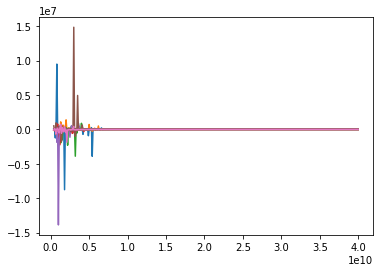

In [95]:
for i in range(17):
    plt.plot(rds_dataframe_array[:,0], rds_dataframe_array[:,(i + 1)])

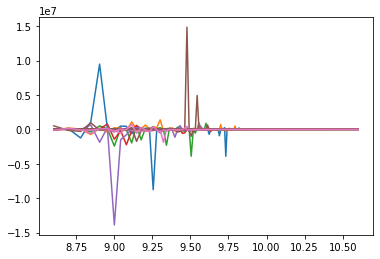

In [96]:
for i in range(17):
    plt.plot(np.log10(rds_dataframe_array[:,0]), rds_dataframe_array[:,(i + 1)])

In [97]:
############################################ plotting points for selected frequency ####################################

In [98]:
freq_list = cgd_dataframe_array[:, 0]
functions_list = ['cgd_meas', 'cgs_meas', 'gm_meas', 'cds_meas', 'rds_model']

In [99]:
from tkinter import *
from tkinter import ttk

root = Tk()
root.title('Select frequency and function values')
root.geometry("700x700")

selected_freq_values = []
selected_function = []


def selected_freq(event):
#     myLabel = Label(root, text=f'vd: {vdCombo.get()}').pack() #.grid(row = 75, column = 50)
    selected_freq_values.append(freqCombo.get())
    
# def selected_func(event):
# #     myLabel = Label(root, text=f'vg: {vgCombo.get()}').pack()#, anchor = "e")#.grid(row = 475, column = 550)
#     selected_function.append(funcCombo.get())


def show(event):    
    selected_function.append(funcCombo.get())
    Label_freq_func = Label(root,text=f'frequency: {freqCombo.get()}, function: {funcCombo.get()}').pack()
    
def close_window (): 
    root.destroy()


freqCombo = ttk.Combobox(root, value= freq_list)
freqCombo.current(0)
freqCombo.bind("<<ComboboxSelected>>", selected_freq)
freqCombo.pack()
freqCombo.place(x = 75, y = 25)


funcCombo = ttk.Combobox(root, value= functions_list)
funcCombo.current(0)
funcCombo.bind("<<ComboboxSelected>>", show)
funcCombo.pack()
funcCombo.place(x = 475, y = 25)


button = ttk.Button(root, text = "close", command = close_window)
button.pack()
button.place(x = 315, y = 500)

    
root.mainloop()

In [100]:
selected_freq_values


['1.00000000e+09', '1.00000000e+09', '1.00000000e+09']

In [101]:
selected_function

['cgd_meas', 'cgs_meas', 'gm_meas']

In [102]:
def get_array(func):
    if func == 'cgd_meas':
        return cgd_dataframe_array
    elif func == 'cgs_meas':
        return cgs_dataframe_array
    elif func == 'gm_meas':
        return gm_dataframe_array
    elif func == 'cds_meas':
        return cds_dataframe_array
    else:
        return rds_dataframe_array
    

In [104]:
vg_values = [float(i) for i in vg_values]
vg_values = [np.around(vg, decimals = 3) for vg in vg_values]
vg_values

[-5.001,
 -4.5,
 -4.001,
 -3.4,
 -3.299,
 -3.2,
 -3.0,
 1.4,
 1.201,
 0.6,
 0.001,
 -0.4,
 -0.799,
 -1.599,
 -2.001,
 -2.401,
 -2.9,
 -3.1]

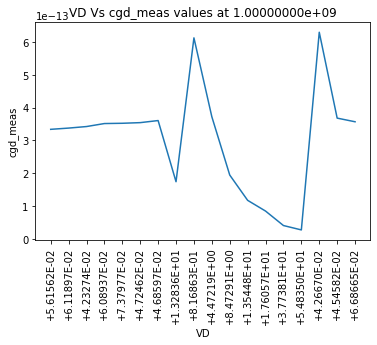

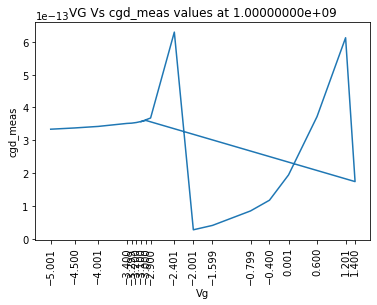

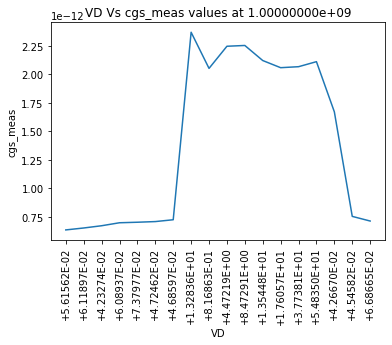

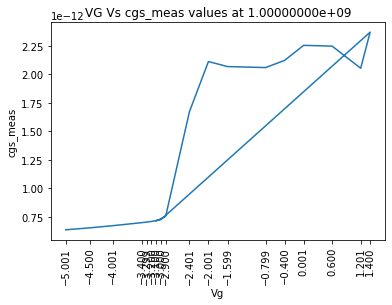

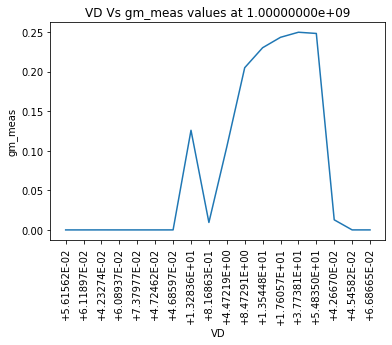

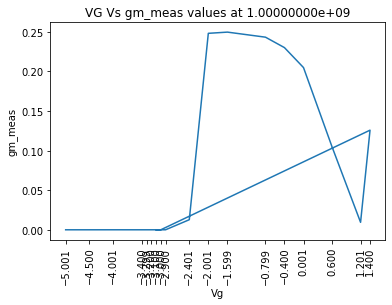

In [105]:
for f, func in zip(selected_freq_values, selected_function):
    func_array = get_array(func)
#     print(func_array[:, 0])
    row = list(func_array[:, 0]).index(np.float(f))
#     plt.title(f'freq: {f}, function: {func}')
    plt.title(f'VD Vs {func} values at {f}')
    plt.plot(vd_values, func_array[row, 1:])
    plt.xticks(rotation=90)
    plt.xticks(vd_values)
    plt.xlabel('VD')
    plt.ylabel(func)
    plt.show()
    
    plt.title(f'VG Vs {func} values at {f}')
    plt.plot(vg_values, func_array[row, 1:])
    plt.xticks(rotation=90)
    plt.xticks(vg_values)
    plt.xlabel('Vg')
    plt.ylabel(func)
    plt.show()
    